In [1]:
%matplotlib inline


# Plot 2D Vertex Data


This plots example 2D vertex data onto an example subject, S1, onto a flatmap
using quickflat. In order for this to run, you have to have a flatmap for this
subject in the pycortex filestore.

The cortex.Vertex2D object is instantiated with two numpy arrays of the same
size as the total number of vertices in that subject's flatmap. Each pixel is
colored according to both vlaues given for the nearest vertex in the flatmap.

Instead of random test data, you can replace these with any arrays that are
the length of the all the vertices in the subject.


OSError: read past end of file

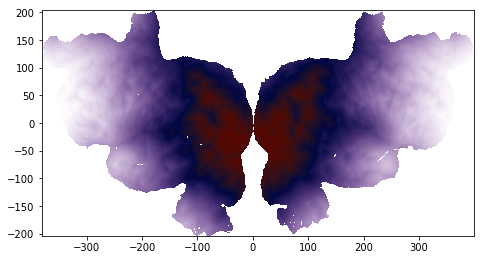

In [2]:
import cortex
import cortex.polyutils
import numpy as np
import matplotlib.pyplot as plt

subject = 'S1'

# In order to get the number of vertices in this subject's cortical surface
# we have to load in their surfaces and get the number of points in each
surfs = [cortex.polyutils.Surface(*d)
         for d in cortex.db.get_surf(subject, "fiducial")]

# This is the total number of vertices in the left and right hemispheres
num_verts = [s.pts.shape[0] for s in surfs]

# Creating one random dataset that is basically a gradient across each
# hemisphere based on vertex number
test_data1 = np.hstack((np.arange(num_verts[0]), np.arange(num_verts[1])))

# Picking a different vertex in each hemisphere to create another fake
# gradient away from that vertex
second_verts = [n / 4 for n in num_verts]
test_data2 = np.hstack((np.abs(np.arange(num_verts[0]) - second_verts[0]),
                        np.abs(np.arange(num_verts[1]) - second_verts[1])))

# This creates a 2D Vertex object with both of our test datasets for the
# given subject
vertex_data = cortex.Vertex2D(test_data1, test_data2, subject)
cortex.quickshow(vertex_data, with_colorbar=False)
plt.show()